In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
### KNN Classifier ==> Untuk Kasus Klasifikasi
## KNN Regressor ==> Untuk Kasus Regresi

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [4]:
## Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
WikiId           2
Name_wiki        2
Age_wiki         4
Hometown         2
Boarded          2
Destination      2
Lifeboat       546
Body           804
Class            2
dtype: int64

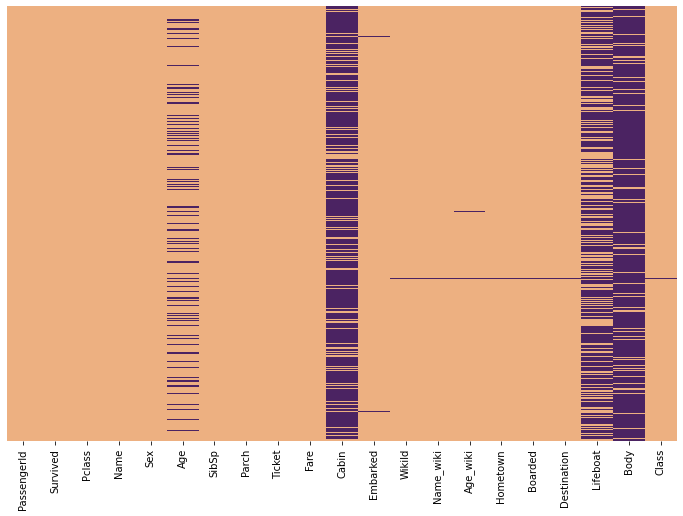

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isna(), cmap='flare', yticklabels=False, cbar=False)
plt.show()

In [8]:
## Pengecekan Imbalance (Distribusi data Target) ==> Hanya untuk Klasifikasi

In [9]:
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [10]:
pd.crosstab(df['Survived'], columns='count', normalize=True)*100

col_0,count
Survived,
0.0,61.616162
1.0,38.383838


Jika perbandingan target diatas 80% (salah satu) ==> Data Imbalanced

Data Imbalanced ==> Detector

Detector ==> Kita ingin mencari Target - Label Tertentu

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
WikiId,889.0,665.466817,380.796997,1.00,336.0000,672.0000,996.0,1314.0000
Age_wiki,887.0,29.322063,13.930089,0.42,20.0000,28.0000,38.0,74.0000
Class,889.0,2.307087,0.837713,1.00,2.0000,3.0000,3.0,3.0000


In [12]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked,Name_wiki,Hometown,Boarded,Destination,Lifeboat,Body
count,891,891,891,204,889,889,889,889,889,345,87
unique,891,2,681,147,3,889,437,4,234,22,87
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S,"Braund, Mr. Owen Harris","New York, New York, US",Southampton,New York City,15,175MB
freq,1,577,7,4,644,1,50,638,168,28,1


In [13]:
titanicDesc = []
for i in df.columns:
    titanicDesc.append([i, 
                   df[i].dtypes, 
                   df[i].isna().sum(),
                   round(((df[i].isna().sum() / len(df)) * 100), 2),
                   df[i].nunique(),
                   df[i].drop_duplicates().sample(2).values
    ])
pd.DataFrame(
data=titanicDesc,
columns = [
    'features',
    'DataType',
    'Null',
    'NullPercentage',
    'Unique',
    'Unique Sample'
])

,features,DataType,Null,NullPercentage,Unique,Unique Sample
0,PassengerId,int64,0,0.00,891,"[831, 166]"
1,Survived,float64,0,0.00,2,"[1.0, 0.0]"
2,Pclass,int64,0,0.00,3,"[1, 3]"
3,Name,object,0,0.00,891,"[Rosblom, Mr. Viktor Richard, Bryhl, Mr. Kurt ..."
4,Sex,object,0,0.00,2,"[male, female]"
5,Age,float64,177,19.87,88,"[70.0, 24.0]"
6,SibSp,int64,0,0.00,7,"[3, 5]"
7,Parch,int64,0,0.00,7,"[5, 4]"
8,Ticket,object,0,0.00,681,"[2641, STON/O 2. 3101289]"
9,Fare,float64,0,0.00,248,"[153.4625, 42.4]"


In [14]:
## mini EDA - Quick EDA

In [15]:
### Drop yg Missing Value nya di atas 50%

In [16]:
df.drop(columns=['Body', 'Lifeboat', 'Cabin'], inplace=True)

In [17]:
## Feature Selection Menggunakan EDA

## Buat Hipotesa Awal
- Pclass Berpengaruh terhadap Survival Rates
- Sex - Gender Berpengaruh terhadap Survival Rates
- Age/Usia berpengaruh terhadap Survival rates
- SibSp (Sibling - Spouse) Berpengaruh terhadap survival rates
- Parch (Parent - Children) Berpengaruh terhadap survival rates
- Embarked - Boarded - Berpengaruh terhadap Survival rates

In [18]:
df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [19]:
(df[['Pclass', 'Survived']].groupby(['Pclass']).mean()*100).round(2)

,Survived
Pclass,
1,62.96
2,47.28
3,24.24


- Pclass 1 Memiliki Survival Rate Paling Tinggi => 62.96%
- Pclass Berpengaruh terhadap Survival Rates

In [20]:
## Cek Sex

In [21]:
df[['Sex', 'Survived']].groupby(['Sex']).mean()*100

,Survived
Sex,
female,74.203822
male,18.890815


- Sex - Female memiliki Survival rates lebih tinggi => 74.2%
- Sex berpengaruh terhadap Survival rates

In [22]:
## Cek Age/Usia

In [23]:
#### Melakukan Binning terhadap Age_Wiki (Usia) agarr lebih mudah di analisa

In [24]:
df['Age_wiki'] = df['Age_wiki'].fillna(df['Age_wiki'].mean())

In [25]:
age_bin = [0, 10, 20, 40, df['Age_wiki'].max()] ## Membuat Kelompok Usia

In [26]:
labels = ['Kids', 'Teenager', 'Adult', 'Old'] ## Label untuk kelompok Usia

In [27]:
df['age_bin'] = pd.cut(df['Age_wiki'], bins=age_bin, labels= labels)

In [28]:
# df.head()

In [29]:
(df[['age_bin', 'Survived']].groupby(['age_bin']).mean()*100).sort_values('Survived', ascending=False)

,Survived
age_bin,
Kids,56.944444
Adult,37.931034
Old,37.426901
Teenager,32.258065


- Kelompok Usia Kids (0-10) Memiliki Survival Rates paling tinggi diantara Kelompok Usia lain

In [30]:
## Cek SibSp

In [31]:
(df[['SibSp', 'Survived']].groupby(['SibSp']).mean()*100).sort_values('Survived', ascending=False)

,Survived
SibSp,
1,53.588517
2,46.428571
0,34.539474
3,25.000000
4,16.666667
5,0.000000
8,0.000000


- Jumlah Siblings-Spouse berpengaruh terhadap survival rates, Jumlah SibSp = 1 paling tinggi Survival ratesnya => 53.60%

In [32]:
(df[['Parch', 'Survived']].groupby(['Parch']).mean()*100).sort_values('Survived', ascending=False)

,Survived
Parch,
3,60.000000
1,55.084746
2,50.000000
0,34.365782
5,20.000000
4,0.000000
6,0.000000


- Jumlah Parent - Children berpengaruh terhadap Survival Rates - Jumlah Parch = 3, paling tinggi survival rates => 60%

In [33]:
## Cek Embarked - Boarded

In [34]:
(df[['Embarked', 'Survived']].groupby(['Embarked']).mean()*100).sort_values('Survived', ascending=False)

,Survived
Embarked,
C,55.357143
Q,38.961039
S,33.695652


In [35]:
(df[['Boarded', 'Survived']].groupby(['Boarded']).mean()*100).sort_values('Survived', ascending=False)

,Survived
Boarded,
Cherbourg,56.024096
Queenstown,38.157895
Southampton,34.326019
Belfast,0.000000


- Lokasi Embarked - Boarded berpengaruh terhadap Survival Rates - Plaing tinggi Survival ratesnya Cherbourg ==> 56%

In [36]:
df_1 = df[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_wiki', 'Fare']]

In [37]:
df_1.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    2
Age_wiki    0
Fare        0
dtype: int64

In [38]:
df_1['Embarked'] = df_1['Embarked'].fillna('S')

In [39]:
df_1['Age_wiki'] = df_1['Age_wiki'].fillna(df_1['Age_wiki'].mean())

In [40]:
df_1.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_wiki,Fare
0,0.0,3,male,1,0,S,22.0,7.2500
1,1.0,1,female,1,0,C,35.0,71.2833
2,1.0,3,female,0,0,S,26.0,7.9250
3,1.0,1,female,1,0,S,35.0,53.1000
4,0.0,3,male,0,0,S,35.0,8.0500


In [41]:
## Encoding

In [42]:
df_1['Sex'] = df_1['Sex'].map({'male' : 0, 'female' : 1})
## Label Encoding => Untuk mengubah kategorika/Text menjadi angka -> Khusus Kolom Kategori Ordinal
## Isi datanya berupa kategorikal/Text memiliki Urutan

In [43]:
df_1 = pd.get_dummies(df_1, columns = ['Embarked']) 
## Label Encoding => Untuk mengubah kategorika/Text menjadi angka -> Khusus Kolom Kategori Ordinal
## Isi datanya berupa kategorikal/Text yg TIDAK memiliki Urutan

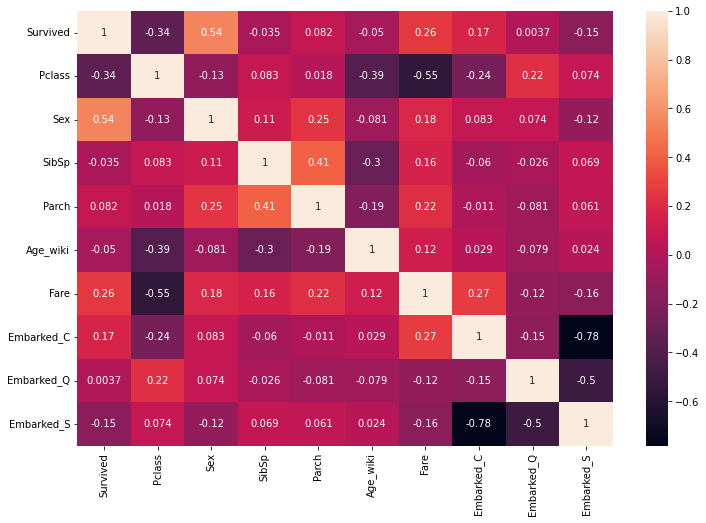

In [44]:
## Cek Korelasi
plt.figure(figsize=(12,8))
sns.heatmap(df_1.corr(),annot=True)
plt.show()

## Karena jumlah features cukup sedikit, sehingga sementara akan kita gunakan semua features, meskipun memiliki korelasi rendah

In [45]:
## Machine Learning Modelling

In [46]:
## Simple Model

In [47]:
## Splitting Data

In [48]:
X = df_1.drop(columns='Survived')
y = df_1['Survived']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size=0.8, random_state=42)

## Ketika untuk kasus klasifikasi, HARUS menggunakan Parameter Stratify

In [51]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Age_wiki,Fare,Embarked_C,Embarked_Q,Embarked_S
692,3,0,0,0,37.0,56.4958,0,0,1
481,2,0,0,0,37.0,0.0000,0,0,1
527,1,0,0,0,57.0,221.7792,0,0,1
855,3,1,0,1,18.0,9.3500,0,0,1
801,2,1,1,1,31.0,26.2500,0,0,1


In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model_LR = LogisticRegression()

In [54]:
model_LR.fit(X_train, y_train)

LogisticRegression()

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
model_KNN = KNeighborsClassifier()

In [57]:
model_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
model_KNN.predict(X_train[:50])

array([1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Evaluation Matrix untuk Klasifikasi
Base:
    Confusion Matrix
    - TP ==> True Positive ==> Ketika prediksi Positif dan Aktual Positif
    - FP ==> False Positive ==> Ketika prediksi Negatif dan Aktual Positif
    - TN ==> True Negative ==> Ketika prediksi Negatif dan Aktual Negatif
    - FN ==> False Negative ==> Ketika prediksi Negatif dan Aktual Positif
    
    - Positive ==> Ketika Prediksi Positif
    - Negative ==> Ketika Prediksi Negatif
    
    - True ==> Ketika Prediksi SAMA DENGAN AKTUAL
    - False ==> Ketika Prediksi TIDAK SAMA DENGAN AKTUAL ==> Error
    
    Beberapa Measurement :
        - Accuracy
        - Presition
        - Recall
        - F1 Score

Contoh Kasus :
    - Meminimalisir False Positive
    
    - Kita akan membuat ML Model untuk Memprediksi Email SPAM dan Non-SPAM
    
    Error akan ada 2:
        1. Kita prediksi Email SPAM, Padahal Aktualnya Email Non-SPAM (False Positive)
        2. Kita prediksi Email Non-Spam, Padahal Aktualnya Email SPAM (False Negative)
        
        Kita akan memisahkan-memasukan email sesuai prediksi
        ada 2 Box/Folder
        - Folder Inbox (Untuk Non-SPAM)
        - Folder Inbox (Untuk SPAM)
        - Risiko akan lebih tinggi ketika terjadi False Positif
        (Email Non-SPAM diprediksi sebagai SPAM) sehingga perlu diminimalisir
        
Contoh Kasus 2:
    - Meminimalisir False Negative
    
    - Kita akan membuat ML Model untuk prediksi COVID dan NON-COVID
    
    Error akan ada 2:
        1. Kita prediksi orang COVID padahal aktualnya NON-COVID (False Positive)
        2. Kita prediksi orang NON-COVID padahal aktualnya COVID (False Negative)
        
        - Risiko akan lebih tinggi ketika terjadi False Negative (Orang Positif COVID tetapi di prediksi NON-Covid)
        Sehingga perlu diminimalisir

## Accuracy
- Akurasi dapat digunakan ketika Dataset Balance
- Pengecekan bisa dg `df['target'].value_counts()`, jika salah satu ada yang diatas 80% ==> Imbalance
- Akurasi Kurang tepat digunakan jika Dataset Imbalance (Akurasi dapat menipu)
- Perbandingan antara **Jumlah SELURUH Tebakan/Prediksi yang BENAR (True)** dibandingkan dengan **Jumlah SELURUH Data/Tebakan/Prediksi**

\begin{equation}
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
\end{equation}

## Precision (+)
- Ketika kita menargetkan **False Positif sekecil mungkin**
- Digunakan ketika Risiko Error (False Positive) sangat tinggi / Lebih Fatal dibanding False Negative
- Kita harus menguasai Domain Knowledgeuntuk mengetahui Impact dari Error/Risiko Error
- Contoh Kasus : Klasifikasi Email SPAM - NON-SPAM
- Perbandingann antara **Jumlah SELURUH Tebakan/Prediksi BENAR (True) Positive** dibandingkan dg **Jumlah SELURUH Tebakan/Prediksi Positive**

\begin{equation}
Precision (+) = \frac{TP}{TP + FP}
\end{equation}

## Precision (-)
\begin{equation}
Precision (-) = \frac{TN}{TN + FN}
\end{equation}

## Recall (+)
- Ketika kita menargetkan **False Negative Sekecil Mungkin**
- Digunakan ketika risiko Error (False Negative) Sangat tinggi/Lebih Fatal dibanding risiko Flase Positive
- Harus menguasai Domain Knowledge
- Contoh kasus : Klasifikasi Pasien Covid - Non-Covid
- Perbandingan antara **Jumlah SELURUH Tebakan/Prediksi BENAR (True) Positive** dibandingkan dengan **Jumlah SELURUH Data AKTUAL Positive**

\begin{equation}
Recall (+) = \frac{TP}{TP + FN}
\end{equation}

## Recall (-)

\begin{equation}
Recall (-) = \frac{TN}{TN + FP}
\end{equation}

### ===Notes===
Recall dan Precision Berlaku Trade Off (Berkebalikan)

Semakin Tinggi Recall (+), Semakin rendah Precision (+)

Positive dan Negative Berkebalikan jika matrix sama
Semakin Tinggi Recall (+), Semakin rendah Recall (-)

Recall (-) dan Precision (+) ==> Searah/Linear
Semakin Tinggi Recall (-), semakin tinggi Precision (+)

Recall (+) dan Precision (-) ==> Searah/Linear
Semakin Tinggi Recall (+), semakin tinggi Precision (-)

## F1 Score
- Rata-rata Harmonik antara Recall dan Precision

\begin{equation}
F1 Score = 2 * \frac{Recall (+) * Precision (+)}{Recall (+) + Precision (+)}
\end{equation}

Semua Evaluation Matrix memiliki Range
dari 0 sampai 1
dengan nilai Terbaik 1
Jika diatas 0.98 termasuk too good to be true, harus dianalisa
Jika dibawah 0.5, Too Bad, harus di analisa lebih lanjut

In [59]:
## Evaluation Matrix

In [60]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
## Training Data

In [62]:
## Logistic Regression

In [63]:
y_pred_train = model_LR.predict(X_train)

In [64]:
accuracy_score(y_train, y_pred_train)

0.8061797752808989

In [65]:
## KNN

In [66]:
y_pred_train2 = model_KNN.predict(X_train)

In [67]:
accuracy_score(y_train, y_pred_train2)

0.7907303370786517

In [68]:
def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    Acc = accuracy_score(y_true, y_pred)
    Rec = recall_score(y_true, y_pred)
    Prec = precision_score(y_true, y_pred)
    F1 = f1_score(y_true, y_pred)
    return Acc, Rec, Prec, F1

In [69]:
#### Eva Matrix Logistic Regression

In [70]:
## Train

In [71]:
Log_Acc_train, Log_Rec_train, Log_Prec_train, Log_F1_train = Eva_Matrix(model_LR, X_train, y_train)

In [72]:
## Test

In [73]:
Log_Acc_test, Log_Rec_test, Log_Prec_test, Log_F1_test = Eva_Matrix(model_LR, X_test, y_test)

In [74]:
data_log ={
    'Log Train' : [Log_Acc_train, Log_Rec_train, Log_Prec_train, Log_F1_train],
    'Log Test' : [Log_Acc_test, Log_Rec_test, Log_Prec_test, Log_F1_test]
}

In [75]:
## Evaluation Base Model

In [76]:
pd.DataFrame(data=data_log, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

,Log Train,Log Test
Accuracy,0.806180,0.810056
Recall,0.703297,0.681159
Precision,0.771084,0.796610
F1,0.735632,0.734375


In [77]:
### Evaluation Matrix KNN

In [78]:
## Train

In [79]:
KNN_Acc_train, KNN_Rec_train, KNN_Prec_train, KNN_F1_train = Eva_Matrix(model_KNN, X_train, y_train)

In [80]:
## Test 

In [81]:
KNN_Acc_test, KNN_Rec_test, KNN_Prec_test, KNN_F1_test = Eva_Matrix(model_KNN, X_test, y_test)

In [82]:
data_KNN ={
    'KNN Train' : [KNN_Acc_train, KNN_Rec_train, KNN_Prec_train, KNN_F1_train],
    'KNN Test' : [KNN_Acc_test, KNN_Rec_test, KNN_Prec_test, KNN_F1_test]
}

In [83]:
pd.DataFrame(data=data_KNN, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

,KNN Train,KNN Test
Accuracy,0.790730,0.608939
Recall,0.655678,0.521739
Precision,0.764957,0.493151
F1,0.706114,0.507042


In [84]:
model_LR.predict([[2, 0, 1, 1, 36, 30.50, 0, 1, 0]])

array([0.])

In [85]:
model_LR.predict_proba([[2, 0, 1, 1, 36, 30.50, 0, 1, 0]])

array([[0.79659452, 0.20340548]])

In [86]:
### Random Guessing

In [87]:
y_pred_train_Sex = X_train['Sex']

In [88]:
y_pred_test_Sex = X_test['Sex']

In [89]:
accuracy_score(y_train, y_pred_train_Sex)

0.7893258426966292

In [90]:
## Coin Toss

In [91]:
random_pred_train = np.random.choice([0,1], size=len(y_train))

In [92]:
random_pred_test = np.random.choice([0,1], size=len(y_test))

In [93]:
accuracy_score(y_train, random_pred_train)

0.5014044943820225

In [94]:
accuracy_score(y_test, random_pred_test)

0.5083798882681564

In [95]:
### Improvement

In [96]:
### Adding - Modify Features

In [97]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Class,age_bin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3.0,Adult
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",1.0,Adult
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,3.0,Adult
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1.0,Adult
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,3.0,Adult


In [98]:
name = 'Braund, Mr. Owen Harris'
name.split(', ')[1].split('.')[0]

'Mr'

In [99]:
df['title'] = df['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])

In [100]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Class,age_bin,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3.0,Adult,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",1.0,Adult,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,3.0,Adult,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1.0,Adult,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,3.0,Adult,Mr


In [101]:
def modif_title(x):
    if x in ['Mr', 'Miss', 'Mrs', 'Master']:
        return x
    else:
        return 'Other'

In [102]:
df['title'] = df['title'].apply(modif_title)

In [103]:
df['title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: title, dtype: int64

In [104]:
df['isAlone'] = (df['SibSp'] == 0) & (df['Parch'] == 0)

In [105]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Class,age_bin,title,isAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3.0,Adult,Mr,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",1.0,Adult,Mrs,False
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,3.0,Adult,Miss,True
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1.0,Adult,Mrs,False
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,3.0,Adult,Mr,True


In [106]:
df['isAlone'] = df['isAlone'].astype('int')

In [107]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Class,age_bin,title,isAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",3.0,Adult,Mr,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",1.0,Adult,Mrs,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,3.0,Adult,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",1.0,Adult,Mrs,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,3.0,Adult,Mr,1


In [108]:
### Binning Fare

In [109]:
df['bin_fare'] = pd.cut(df['Fare'], bins = 4, labels = [0,1,2,3])

In [110]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
WikiId           2
Name_wiki        2
Age_wiki         0
Hometown         2
Boarded          2
Destination      2
Class            2
age_bin          0
title            0
isAlone          0
bin_fare         0
dtype: int64

In [111]:
df['Embarked'] = df['Embarked'].fillna('S')

In [112]:
df['age_bin']

0         Adult
1         Adult
2         Adult
3         Adult
4         Adult
         ...   
886       Adult
887    Teenager
888        Kids
889       Adult
890         Old
Name: age_bin, Length: 891, dtype: category
Categories (4, object): ['Kids' < 'Teenager' < 'Adult' < 'Old']

In [113]:
df_2 = df[['Survived', 'Pclass', 'Sex', 'Embarked', 'title', 'isAlone', 'bin_fare', 'age_bin']]

In [114]:
df_2.head()

,Survived,Pclass,Sex,Embarked,title,isAlone,bin_fare,age_bin
0,0.0,3,male,S,Mr,0,0,Adult
1,1.0,1,female,C,Mrs,0,0,Adult
2,1.0,3,female,S,Miss,1,0,Adult
3,1.0,1,female,S,Mrs,0,0,Adult
4,0.0,3,male,S,Mr,1,0,Adult


In [115]:
df_2['Sex'] = df_2['Sex'].map({'male' : 0, 'female' : 1})

In [116]:
df_2 = pd.get_dummies(data=df_2, columns=['Embarked', 'title'])

In [117]:
df_2['age_bin'] = df_2['age_bin'].map({'Kids' : 0, 'Teenager' : 1, 'Adult' : 2, 'Old' : 3})

In [118]:
df_2.head()

,Survived,Pclass,Sex,isAlone,bin_fare,age_bin,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Other
0,0.0,3,0,0,0,2,0,0,1,0,0,1,0,0
1,1.0,1,1,0,0,2,1,0,0,0,0,0,1,0
2,1.0,3,1,1,0,2,0,0,1,0,1,0,0,0
3,1.0,1,1,0,0,2,0,0,1,0,0,0,1,0
4,0.0,3,0,1,0,2,0,0,1,0,0,1,0,0


In [119]:
### Re-Modelling

In [120]:
## Splitting Data

In [121]:
X_2 = df_2.drop(columns='Survived')
y_2 = df_2['Survived']

In [122]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, stratify = y_2, test_size = .20, random_state = 42)

In [123]:
X_train_2.head()

,Pclass,Sex,isAlone,bin_fare,age_bin,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Other
692,3,0,1,0,2,0,0,1,0,0,1,0,0
481,2,0,1,0,2,0,0,1,0,0,1,0,0
527,1,0,1,1,3,0,0,1,0,0,1,0,0
855,3,1,0,0,1,0,0,1,0,0,0,1,0
801,2,1,0,0,2,0,0,1,0,0,0,1,0


In [124]:
X_test_2.head()

,Pclass,Sex,isAlone,bin_fare,age_bin,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Other
565,3,0,0,0,2,0,0,1,0,0,1,0,0
160,3,0,0,0,3,0,0,1,0,0,1,0,0
553,3,0,1,0,2,1,0,0,0,0,1,0,0
860,3,0,0,0,3,0,0,1,0,0,1,0,0
241,3,1,0,0,1,0,1,0,0,1,0,0,0


In [125]:
df_2.isna().sum()

Survived        0
Pclass          0
Sex             0
isAlone         0
bin_fare        0
age_bin         0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
title_Master    0
title_Miss      0
title_Mr        0
title_Mrs       0
title_Other     0
dtype: int64

In [126]:
### Modelling

In [127]:
model_LR2 = LogisticRegression()

In [128]:
model_LR2.fit(X_train_2, y_train_2)

LogisticRegression()

In [129]:
model_KNN2 = KNeighborsClassifier()

In [130]:
model_KNN2.fit(X_train_2, y_train_2)

KNeighborsClassifier()

In [131]:
### Evaluation Matrix

In [132]:
## LogReg

In [133]:
## Train

In [134]:
Log_Acc_train2, Log_Rec_train2, Log_Prec_train2, Log_F1_train2 = Eva_Matrix(model_LR2, X_train_2, y_train_2)

In [135]:
## Test

In [136]:
Log_Acc_test2, Log_Rec_test2, Log_Prec_test2, Log_F1_test2 = Eva_Matrix(model_LR2, X_test_2, y_test_2)

In [137]:
data_log2 ={
    'Log Train' : [Log_Acc_train2, Log_Rec_train2, Log_Prec_train2, Log_F1_train2],
    'Log Test' : [Log_Acc_test2, Log_Rec_test2, Log_Prec_test2, Log_F1_test2]
}
pd.DataFrame(data=data_log2, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

,Log Train,Log Test
Accuracy,0.825843,0.782123
Recall,0.732601,0.666667
Precision,0.796813,0.741935
F1,0.763359,0.702290


In [138]:
## KNN

In [139]:
## Train

In [140]:
KNN_Acc_train2, KNN_Rec_train2, KNN_Prec_train2, KNN_F1_train2 = Eva_Matrix(model_KNN2, X_train_2, y_train_2)

In [141]:
## Test

In [142]:
KNN_Acc_test2, KNN_Rec_test2, KNN_Prec_test2, KNN_F1_test2 = Eva_Matrix(model_KNN2, X_test_2, y_test_2)

In [143]:
data_KNN2 ={
    'KNN Train' : [KNN_Acc_train2, KNN_Rec_train2, KNN_Prec_train2, KNN_F1_train2],
    'KNN Test' : [KNN_Acc_test2, KNN_Rec_test2, KNN_Prec_test2, KNN_F1_test2]
}
pd.DataFrame(data=data_KNN2, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

,KNN Train,KNN Test
Accuracy,0.851124,0.793296
Recall,0.717949,0.666667
Precision,0.871111,0.766667
F1,0.787149,0.713178


In [144]:
df_1.head()

,Survived,Pclass,Sex,SibSp,Parch,Age_wiki,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,0,1,0,22.0,7.2500,0,0,1
1,1.0,1,1,1,0,35.0,71.2833,1,0,0
2,1.0,3,1,0,0,26.0,7.9250,0,0,1
3,1.0,1,1,1,0,35.0,53.1000,0,0,1
4,0.0,3,0,0,0,35.0,8.0500,0,0,1


In [145]:
df_2.head()

,Survived,Pclass,Sex,isAlone,bin_fare,age_bin,Embarked_C,Embarked_Q,Embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Other
0,0.0,3,0,0,0,2,0,0,1,0,0,1,0,0
1,1.0,1,1,0,0,2,1,0,0,0,0,0,1,0
2,1.0,3,1,1,0,2,0,0,1,0,1,0,0,0
3,1.0,1,1,0,0,2,0,0,1,0,0,0,1,0
4,0.0,3,0,1,0,2,0,0,1,0,0,1,0,0


In [146]:
### Improvement 2 - Feature Engineering df_1

In [147]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Age_wiki,Fare,Embarked_C,Embarked_Q,Embarked_S
692,3,0,0,0,37.0,56.4958,0,0,1
481,2,0,0,0,37.0,0.0000,0,0,1
527,1,0,0,0,57.0,221.7792,0,0,1
855,3,1,0,1,18.0,9.3500,0,0,1
801,2,1,1,1,31.0,26.2500,0,0,1


In [148]:
X_test.head()

,Pclass,Sex,SibSp,Parch,Age_wiki,Fare,Embarked_C,Embarked_Q,Embarked_S
565,3,0,2,0,24.0,24.1500,0,0,1
160,3,0,0,1,44.0,16.1000,0,0,1
553,3,0,0,0,22.0,7.2250,1,0,0
860,3,0,2,0,41.0,14.1083,0,0,1
241,3,1,1,0,18.0,15.5000,0,1,0


In [149]:
## Improvement Scalling

In [150]:
from sklearn.preprocessing import RobustScaler

In [151]:
sc = RobustScaler()

In [152]:
num_col = df_1[['SibSp', 'Parch', 'Fare', 'Age_wiki']]

In [153]:
sc_train = sc.fit_transform(num_col)

In [154]:
train_sc = pd.DataFrame(sc_train)

In [155]:
train_sc.head()

,0,1,2,3
0,1.0,0.0,-0.312011,-0.333333
1,1.0,0.0,2.461242,0.388889
2,0.0,0.0,-0.282777,-0.111111
3,1.0,0.0,1.673732,0.388889
4,0.0,0.0,-0.277363,0.388889


In [156]:
df_1.head()

,Survived,Pclass,Sex,SibSp,Parch,Age_wiki,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,0,1,0,22.0,7.2500,0,0,1
1,1.0,1,1,1,0,35.0,71.2833,1,0,0
2,1.0,3,1,0,0,26.0,7.9250,0,0,1
3,1.0,1,1,1,0,35.0,53.1000,0,0,1
4,0.0,3,0,0,0,35.0,8.0500,0,0,1


In [157]:
df_scaled = pd.concat([df_1, train_sc], axis = 1)

In [158]:
df_scaled.isna().sum()

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Age_wiki      0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
0             0
1             0
2             0
3             0
dtype: int64

In [159]:
df_scaled.drop(columns=['SibSp', 'Parch', 'Fare', 'Age_wiki'], inplace=True)

In [160]:
#### Splitting Data

In [161]:
X_scaled = df_scaled.drop(columns='Survived')
y_scaled = df_scaled['Survived']

In [162]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_scaled, y_scaled, stratify=y_scaled, test_size = .20, random_state=42)

In [163]:
### KNN

In [164]:
KNN3 = KNeighborsClassifier()

In [165]:
KNN3.fit(X_train_sc, y_train_sc)

KNeighborsClassifier()

In [166]:
## Evaluation Matrix

In [167]:
KNN_Acc_train3, KNN_Rec_train3, KNN_Prec_train3, KNN_F1_train3 = Eva_Matrix(KNN3, X_train_sc, y_train_sc)

In [168]:
KNN_Acc_test3, KNN_Rec_test3, KNN_Prec_test3, KNN_F1_test3 = Eva_Matrix(KNN3, X_test_sc, y_test_sc)

In [169]:
data_KNN3 ={
    'KNN Train' : [KNN_Acc_train3, KNN_Rec_train3, KNN_Prec_train3, KNN_F1_train3],
    'KNN Test' : [KNN_Acc_test3, KNN_Rec_test3, KNN_Prec_test3, KNN_F1_test3]
}
pd.DataFrame(data=data_KNN3, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

,KNN Train,KNN Test
Accuracy,0.852528,0.765363
Recall,0.787546,0.681159
Precision,0.820611,0.701493
F1,0.803738,0.691176


In [170]:
### Improvement Manual Tuning

In [171]:
N_range = range(1, 50, 2)
train_acc = []
test_acc = []

for i in N_range:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_sc, y_train_sc)
    y_pred_tr = model.predict(X_train_sc)
    y_pred_ts = model.predict(X_test_sc)
    acc_train = accuracy_score(y_train_sc, y_pred_tr)
    acc_test = accuracy_score(y_test_sc, y_pred_ts)
    train_acc.append(acc_train)
    test_acc.append(acc_test)

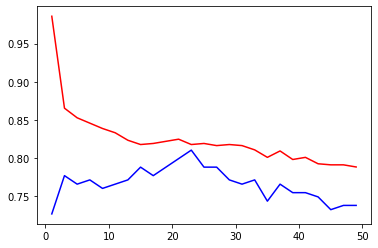

In [172]:
plt.plot(N_range, train_acc, 'r', label = 'Train Score')
plt.plot(N_range, test_acc, 'b', label = 'Test Score')
plt.show()

In [173]:
np.max(test_acc)

0.8100558659217877

In [174]:
N_range = range(1, 50, 2)
train_acc = []
test_acc = []

for i in N_range:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_2, y_train_2)
    y_pred_tr = model.predict(X_train_2)
    y_pred_ts = model.predict(X_test_2)
    acc_train = accuracy_score(y_train_2, y_pred_tr)
    acc_test = accuracy_score(y_test_2, y_pred_ts)
    train_acc.append(acc_train)
    test_acc.append(acc_test)

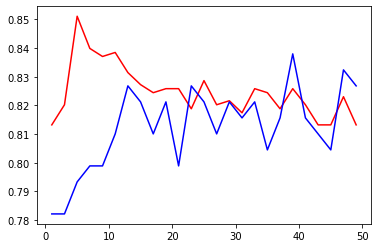

In [175]:
plt.plot(N_range, train_acc, 'r', label = 'Train Score')
plt.plot(N_range, test_acc, 'b', label = 'Test Score')
plt.show()

In [176]:
np.max(test_acc)

0.8379888268156425

In [177]:
N_range[np.argmax(test_acc)]

39

In [178]:
### Remodelling

In [179]:
model_KNN4 = KNeighborsClassifier(n_neighbors=39)

In [180]:
model_KNN4.fit(X_train_2, y_train_2)

KNeighborsClassifier(n_neighbors=39)

In [181]:
### Evaluation Matrix

In [182]:
KNN_Acc_train4, KNN_Rec_train4, KNN_Prec_train4, KNN_F1_train4 = Eva_Matrix(model_KNN4, X_train_2, y_train_2)

In [183]:
KNN_Acc_test4, KNN_Rec_test4, KNN_Prec_test4, KNN_F1_test4 = Eva_Matrix(model_KNN4, X_test_2, y_test_2)

In [184]:
data_KNN4 ={
    'KNN Train' : [KNN_Acc_train4, KNN_Rec_train4, KNN_Prec_train4, KNN_F1_train4],
    'KNN Test' : [KNN_Acc_test4, KNN_Rec_test4, KNN_Prec_test4, KNN_F1_test4]
}
pd.DataFrame(data=data_KNN4, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

,KNN Train,KNN Test
Accuracy,0.825843,0.837989
Recall,0.706960,0.710145
Precision,0.814346,0.844828
F1,0.756863,0.771654


In [185]:
from sklearn.metrics import confusion_matrix, classification_report

In [186]:
## Train

In [187]:
y_train_KNN = model_KNN4.predict(X_train_2)

In [188]:
print(classification_report(y_train_2, y_train_KNN))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       439
         1.0       0.81      0.71      0.76       273

    accuracy                           0.83       712
   macro avg       0.82      0.80      0.81       712
weighted avg       0.82      0.83      0.82       712



weighted = (precision 0 X support 0) + (precision 1 X support 1)
                            / support accuracy

In [189]:
cm_train = confusion_matrix(y_train_2, y_train_KNN, labels=[1, 0])

In [190]:
df_cm = pd.DataFrame(data=cm_train, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm

,Pred 1,Pred 0
Akt 1,193,80
Akt 0,44,395


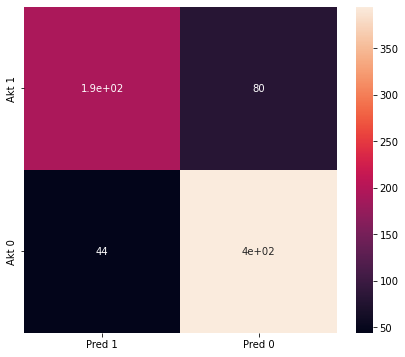

In [191]:
plt.figure(figsize=(7,6))
sns.heatmap(df_cm, annot=True)
plt.show()

In [192]:
## Test

In [194]:
y_test_KNN = model_KNN4.predict(X_test_2)

In [196]:
print(classification_report(y_test_2, y_test_KNN))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       110
         1.0       0.84      0.71      0.77        69

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



In [198]:
cm_test = confusion_matrix(y_test_2, y_test_KNN, labels=[1, 0])

In [199]:
df_cm_test = pd.DataFrame(data=cm_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_test

,Pred 1,Pred 0
Akt 1,49,20
Akt 0,9,101


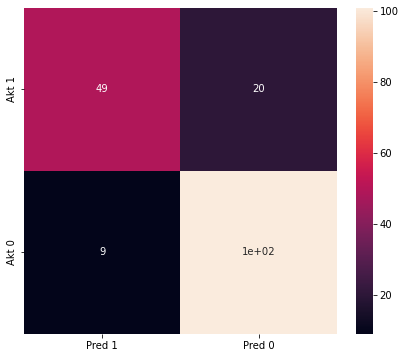

In [200]:
plt.figure(figsize=(7,6))
sns.heatmap(df_cm_test, annot=True)
plt.show()